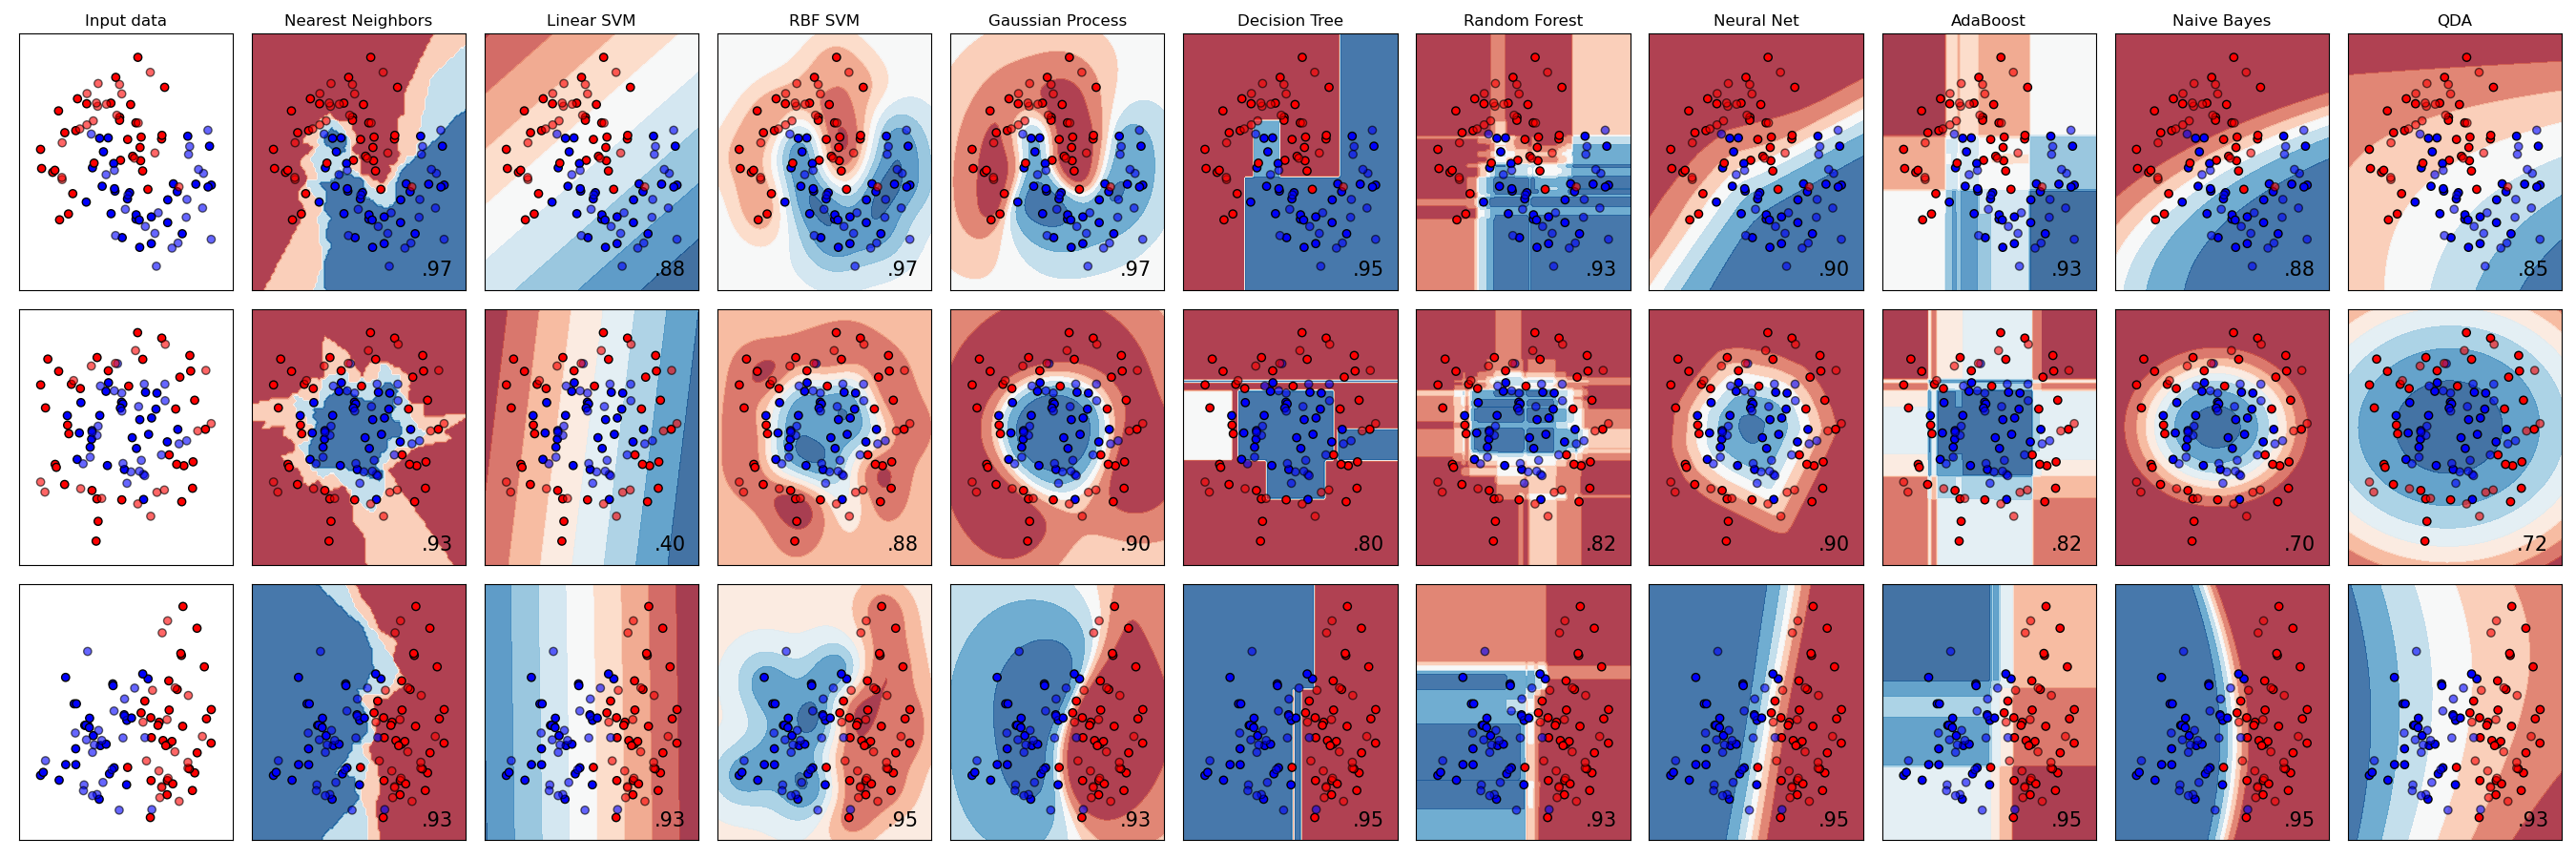

In [2]:
from IPython.display import Image
img = Image('https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png')
img

In [4]:
# Import Python 3's print function and division
from __future__ import print_function, division

# Import GDAL, NumPy, and matplotlib
from osgeo import gdal, gdal_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

# Read in our image and ROI image
img_ds = gdal.Open('../../example/LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)
roi_ds = gdal.Open('../../example/training_data.gtif', gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
roi = roi_ds.GetRasterBand(1).ReadAsArray().astype(np.uint8)

# Display them
plt.subplot(121)
plt.imshow(img[:, :, 4], cmap=plt.cm.Greys_r)
plt.title('SWIR1')

plt.subplot(122)
plt.imshow(roi, cmap=plt.cm.Spectral)
plt.title('ROI Training Data')

plt.show()

ImportError: Traceback (most recent call last):
  File "C:\Users\ant28\Anaconda3\envs\fieldcam\lib\site-packages\osgeo\__init__.py", line 29, in swig_import_helper
    return importlib.import_module(mname)
  File "C:\Users\ant28\Anaconda3\envs\fieldcam\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1030, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 986, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 666, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 565, in module_from_spec
  File "<frozen importlib._bootstrap_external>", line 1173, in create_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
ImportError: DLL load failed while importing _gdal: The specified module could not be found.

On Windows, with Python >= 3.8, DLLs are no longer imported from the PATH.
If gdalXXX.dll is in the PATH, then set the USE_PATH_FOR_GDAL_PYTHON=YES environment variable
to feed the PATH into os.add_dll_directory().